<a href="https://colab.research.google.com/github/vijaygwu/posts/blob/main/Log_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

This code demonstrates the entire process of creating a log-log model: from data generation, through model fitting, to visualization and interpretation of results.

**Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import pandas as pd

We set a random seed for reproducibility.  

* X is generated as exponential of uniform random numbers, creating a range of values.  
* Y is created to be roughly proportional to the square root of X, with some added noise.  

* And create a DataFrame









In [2]:
# Generate some example data
np.random.seed(42)
X = np.exp(np.random.uniform(0, 5, 100))
Y = 2 * X**0.5 * np.random.normal(1, 0.1, 100)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})



In [3]:
# Fit the log-log model
model = ols('np.log(Y) ~ np.log(X)', data=data).fit()

# Print the model summary
print(model.summary())

# Create predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100)
Y_plot = np.exp(model.predict(pd.DataFrame({'X': X_plot})))



                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6418.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           3.94e-91
Time:                        21:15:26   Log-Likelihood:                 99.144
No. Observations:                 100   AIC:                            -194.3
Df Residuals:                      98   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7103      0.017     41.725      0.0

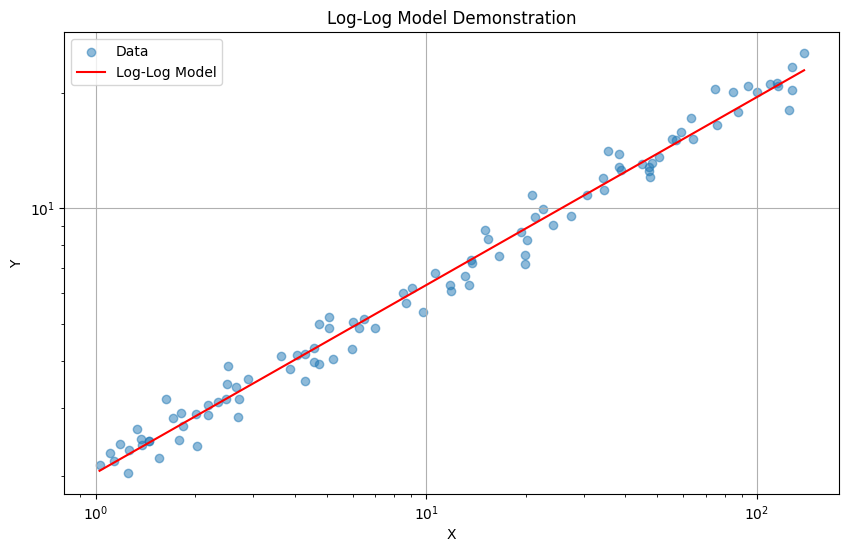

Elasticity: 0.4909


In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Data')
plt.plot(X_plot, Y_plot, color='red', label='Log-Log Model')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Log-Log Model Demonstration')
plt.legend()
plt.grid(True)
plt.show()

# Print the elasticity (coefficient of log(X))
print(f"Elasticity: {model.params['np.log(X)']:.4f}")